<a href="https://colab.research.google.com/github/isaacdono/EA991-Atividade_04/blob/main/solucao/atividade_04_247175.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 04: Classificação de Imagens Usando Redes Convolucionais

**Objetivo:** trabalhar com alguns modelos de redes neurais em uma tarefa de classificação de imagens com a base MedMNIST.

**Base de Dados:** MedMNIST
* https://github.com/MedMNIST/MedMNIST/blob/main/README.md
* https://medmnist.com/

**Dataset selecionado** BloodMNIST
- Número de classes: 8
    - 0 = Basófilos
    - 1 = Eosinófilos
    - 2 = Eritroblastos
    - 3 = Granulócitos imaturos
    - 4 = Linfócitos
    - 5 = Monócitos
    - 6 = Neutrófilos
    - 7 = Plaquetas

![](https://medmnist.com/assets/v2/imgs/BloodMNIST.jpg)

## 0) Instalação da versão mais atual da base MedMNIST+

In [ ]:
# Instalação da versão mais atual da base MedMNIST+ (inclui as opções 64x64, 128x128 e 224x224 para os casos 2D)
!pip install --upgrade git+https://github.com/MedMNIST/MedMNIST.git

  Cloning https://github.com/MedMNIST/MedMNIST.git to /tmp/pip-req-build-ksp770yo
  Running command git clone --filter=blob:none --quiet https://github.com/MedMNIST/MedMNIST.git /tmp/pip-req-build-ksp770yo
  Resolved https://github.com/MedMNIST/MedMNIST.git to commit 805b74237fb5bd2db376fd94e50646b6a8905d9d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

## 1) Seleção de um *dataset* específico da base MedMNIST e extração de algumas informações básicas

**Escolha:** BloodMNIST
- Imagens microscópicas de células sanguíneas periféricas


In [ ]:
import medmnist
from medmnist import INFO, Evaluator

""" Caso Multiclasse --> Imagens de células sanguíneas """

#nome do dataset alvo
data_flag = 'bloodmnist'
download = True

#A partir de um dicionário, recuperamos informações básicas do dataset escolhido
info = INFO[data_flag]

""" task = tipo de tarefa
    labels = dicionário que associa rótulos numéricos {0,1,...} ao nome das classes
    class_names = lista contendo os nomes das classes - obtida a partir do dicionário labels
    splits_info = dicionário que aponta a quantidade de amostras para cada partição dos dados  (train, val, test)
    n_classes = número de classes existentes """

task = info['task']
labels = info['label']
class_names_full = list(labels.values())

#class_names abreviado: específico para o dataset BloodMNIST
class_names = ['Baso','Eosi','Eritro','Granu','Linfo','Mono','Neutro','Plaq']
splits_info = info['n_samples']
n_classes = len(info['label'])

#Extrai o nome da classe referente ao dataset escolhido para, depois, baixar as amostras das diferentes partições
DataClass = getattr(medmnist, info['python_class'])

print(f"Dataset selecionado: {data_flag}")
print(f"Tarefa: {task}")
print(f"Número de classes: {n_classes}")
print(f"Classes disponíveis: {class_names_full}")
print(f"Rótulos: {labels}")
print(f"\nDivisão dos dados: \n Treinamento: {splits_info['train']} amostras \n Validação: {splits_info['val']} amostras \n Teste: {splits_info['test']} amostras")

Dataset selecionado: bloodmnist
Tarefa: multi-class
Número de classes: 8
Classes disponíveis: ['basophil', 'eosinophil', 'erythroblast', 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
Rótulos: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}

Divisão dos dados: 
 Treinamento: 11959 amostras 
 Validação: 1712 amostras 
 Teste: 3421 amostras


### 1.1) Importando várias bibliotecas e funções necessárias

In [ ]:
!pip install torchinfo

In [ ]:
!pip install -U skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 22.3 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms

import skorch
import torchinfo
import torchmetrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from torchmetrics import ConfusionMatrix, Accuracy, F1Score
from mlxtend.plotting import plot_confusion_matrix

### 1.2) Baixando as partições do dataset BloodMNIST

In [ ]:
""" Define as transformações a serem aplicadas nos dados ao baixá-los """
data_transform = transforms.Compose([
    transforms.ToTensor(),
    #Poderíamos acrescentar outras transformações
])

#tamanho das imagens
image_size = 64

#Carrega os subconjuntos de treinamento, validação e teste já como torch.Tensor
train_data = DataClass(split='train', transform=data_transform, size=image_size, download=download)
val_data = DataClass(split='val', transform=data_transform, size=image_size, download=download)
test_data = DataClass(split='test', transform=data_transform, size=image_size, download=download)

""" Verificando os tamanhos das partições """
print(f"Treinamento: {len(train_data)}")
print(f"Validação: {len(val_data)}")
print(f"Teste: {len(test_data)}")

100%|██████████| 156M/156M [02:19<00:00, 1.12MB/s]


Treinamento: 11959
Validação: 1712
Teste: 3421


### 1.3) Visualização de algumas amostras do dataset

**Observação:** cada partição contém os dados de entrada (as imagens) e os rótulos correspondentes nos atributos `.imgs` e `.labels`.

a) Sorteie aleatoriamente duas amostras de cada classe e apresente as imagens juntamente com os rótulos corretos.

In [ ]:
# Criar subset com amostras aleatorias de cada classe
from torch.utils.data import Subset

labels_list = [label[0] for label in train_data.labels]
df = pd.DataFrame({'index': range(len(labels_list)), 'label': labels_list})
df_sampled = df.groupby('label').sample(n=2)
indices = df_sampled['index'].values
subset = Subset(train_data, indices)

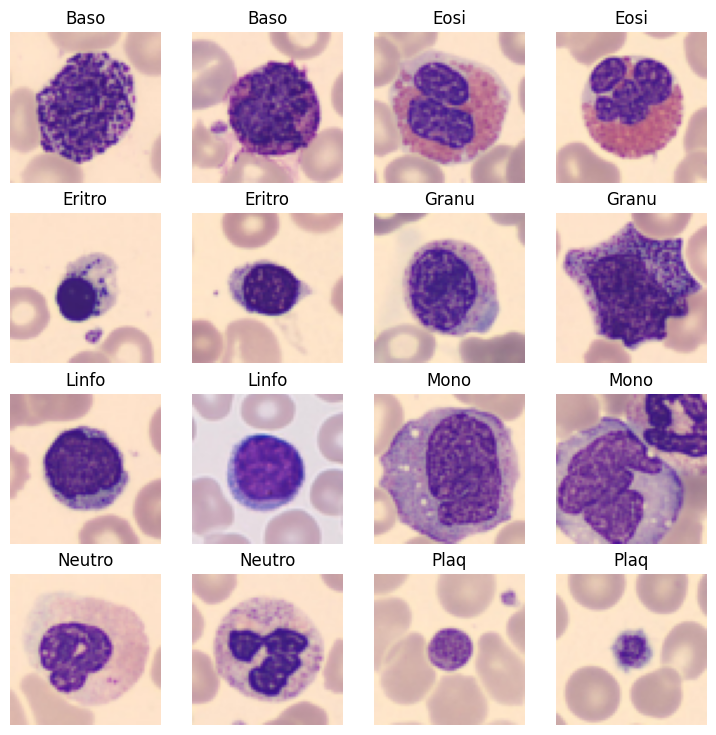

In [ ]:
# Exibição de algumas amostras do dataset de treinamento

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(0, rows * cols):
    #sorteia um índice de amostra de forma aleatória
    img, label = subset[i]
    img = img.permute(1, 2, 0).numpy()  # de (C, H, W) para (H, W, C)
    fig.add_subplot(rows, cols, i+1)
    #exibe a imagem em escala de cinza
    plt.imshow(img)
    #título = rótulo
    plt.title(class_names[label[0]])
    plt.axis(False);

b) Analise a proporção de amostras por classe nas três partições. Comente.

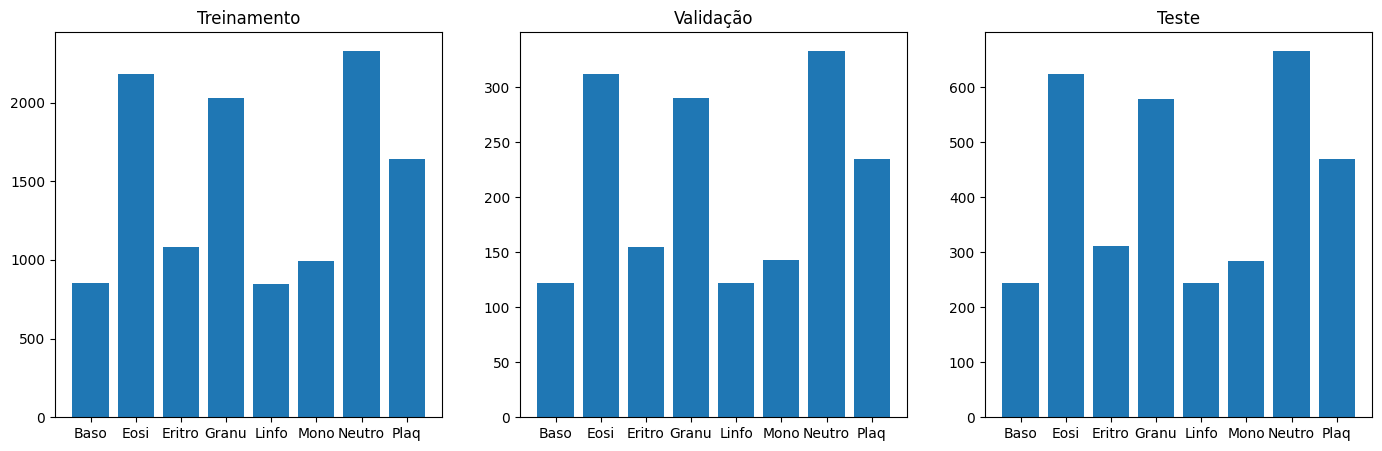

In [ ]:
# Particao de treinamento
fig = plt.figure(figsize=(17, 5))
rows, cols = 1, 3

proportion = []
proportion.append(np.unique(train_data.labels, return_counts=True)[1])
proportion.append(np.unique(val_data.labels, return_counts=True)[1])
proportion.append(np.unique(test_data.labels, return_counts=True)[1])

aux = ['Treinamento', 'Validação', 'Teste']
for i in range(rows * cols):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(f'{aux[i]}')
    plt.bar(class_names, proportion[i])

**COMENTÁRIO:** Cada dataset não está balanceado, por exemplo, as classes Eosi e Neutro têm um número de amostras muito maior que a classe Linfo. Porém, a proporção das classes aparentemente se manteve entre os datasets.

### 1.4) Código agnóstico de dispositivo

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 2) Treinamento e análise de uma rede MLP

c) Construa uma rede MLP e analise o desempenho no conjunto de teste considerando algumas métricas globais e a matriz de confusão. Descreva a metodologia experimental e a arquitetura empregada,
bem como todas as escolhas feitas.

### 2.1) Preparando a arquitetura

**Dica:** uma camada do tipo `nn.Flatten()` pode ser utilizada logo na entrada da rede para dispensar ajustes externos do `shape` dos dados.

In [ ]:
class MLP(nn.Module):
    def __init__(self, num_units = 128, activation_function = nn.ReLU()):
        super().__init__()

        self.backbone = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=3*64*64, out_features=num_units, bias=True),
            activation_function,
            nn.Linear(in_features=num_units, out_features=num_units, bias=True),
            activation_function,
        )
        self.projector = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features=num_units, out_features=n_classes, bias=True),
            nn.Softmax(dim=-1)
        )


    def forward(self, X, **kwargs):
        X = self.backbone(X)
        X = self.projector(X)
        return X

In [ ]:
#Cria uma instância da MLP
mlp_model = MLP(num_units=256).to(device)

#exibe o resumo da arquitetura criada
torchinfo.summary(mlp_model, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [32, 8]                   --
├─Sequential: 1-1                        [32, 256]                 --
│    └─Flatten: 2-1                      [32, 12288]               --
│    └─Linear: 2-2                       [32, 256]                 3,145,984
│    └─ReLU: 2-3                         [32, 256]                 --
│    └─Linear: 2-4                       [32, 256]                 65,792
│    └─ReLU: 2-5                         [32, 256]                 --
├─Sequential: 1-2                        [32, 8]                   --
│    └─Linear: 2-6                       [32, 8]                   2,056
│    └─Dropout: 2-7                      [32, 8]                   --
│    └─Softmax: 2-8                      [32, 8]                   --
Total params: 3,213,832
Trainable params: 3,213,832
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 102.84
Input size (MB): 1.57
F

### 2.2) Preparação dos dados

Usando Skorch, a parte dos *batches* é feita internamente após declararmos o objeto do tipo `NeuralNetClassifier`.

Os dados disponíveis precisam ser colocados no formato e tipo esperados: (n_batches,n_channels,height,width), `torch.float32`.

In [ ]:
from torch.utils.data import TensorDataset

""" Capturando as imagens da partição de treinamento + ponto flutuante + colocando no dispositivo alvo """
XX_train = torch.tensor(train_data.imgs).type(torch.float32).to(device)/255.0
#ajuste da ordem das dimensões
XX_train = XX_train.permute(0,3,1,2)
#rótulos: sem dimensão extra + formato long + dispositivo alvo
y_train = torch.tensor(train_data.labels).squeeze().type(torch.long).to(device)

""" Estenda este tratamento para as partições de validação e teste """

#Validação
XX_val = torch.tensor(val_data.imgs).type(torch.float32).to(device)/255.0
XX_val = XX_val.permute(0,3,1,2)
y_val = torch.tensor(val_data.labels).squeeze().type(torch.long).to(device)

#Teste
XX_test = torch.tensor(test_data.imgs).type(torch.float32).to(device)/255.0
XX_test = XX_test.permute(0,3,1,2)
y_test = torch.tensor(test_data.labels).squeeze().type(torch.long).to(device)

#cria um dataset de validação compatível com o Skorch
valid_data = TensorDataset(XX_val,y_val)

### 2.3) Treinamento da MLP

In [ ]:
from skorch.helper import predefined_split
from skorch import callbacks
from skorch import NeuralNetClassifier

# Define as random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#cria um callback para implementar a parada antecipada
estop = callbacks.EarlyStopping(monitor='valid_acc', patience=50, threshold=0.0001, lower_is_better=False, load_best=True)

#cria um callback para monitor a acurácia no conjunto de treinamento
acc_training = callbacks.EpochScoring(scoring='accuracy', name='train_acc', on_train=True)

net = NeuralNetClassifier(MLP,
    max_epochs=200,
    batch_size= 128,
    module__num_units = 256,
    optimizer=torch.optim.Adam,
    optimizer__weight_decay=0.001,
    optimizer__lr = 0.0001,

    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    train_split = predefined_split(valid_data),
    callbacks = [estop,
                 acc_training],
    device=device,
)

net.fit(XX_train, y_train)

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.3474        1.7233       0.4854        1.3916  0.4106
      2       0.5250        1.3080       0.6414        1.0875  0.3910
      3       0.6139        1.0935       0.6571        0.9455  0.3942
      4       0.6501        0.9830       0.7132        0.8551  0.4036
      5       0.6757        0.9185       0.7044        0.7924  0.3925
      6       0.6890        0.8696       0.7109        0.7993  0.3987
      7       0.7058        0.8234       0.7208        0.7597  0.3906
      8       0.7074        0.8118       0.7523        0.6879  0.3918
      9       0.7264        0.7657       0.7623        0.6930  0.4094
     10       0.7384        0.7455       0.7664        0.6595  0.4598
     11       0.7430        0.7192       0.7856        0.6356  1.0210
     12       0.7505        0.7055       0.7868        0.6061  0.7584
     13       0.7575

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP(
    (backbone): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=12288, out_features=256, bias=True)
      (2): ReLU()
      (3): Linear(in_features=256, out_features=256, bias=True)
      (4): ReLU()
    )
    (projector): Sequential(
      (0): Dropout(p=0.5, inplace=False)
      (1): Linear(in_features=256, out_features=8, bias=True)
      (2): Softmax(dim=-1)
    )
  ),
)

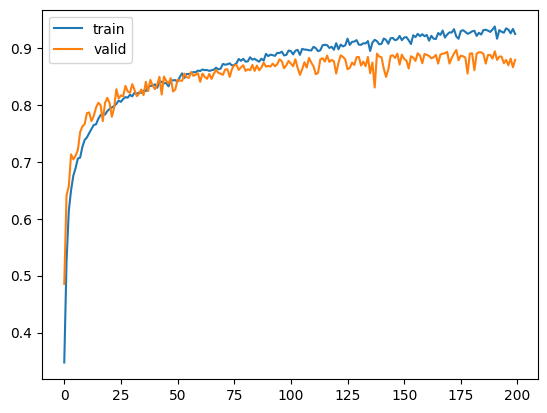

In [ ]:
plt.plot(net.history[:, 'train_acc'])
plt.plot(net.history[:, 'valid_acc'])
plt.legend(['train', 'valid'])
plt.show()

F1 Score: 0.8822
Acurácia: 0.8822


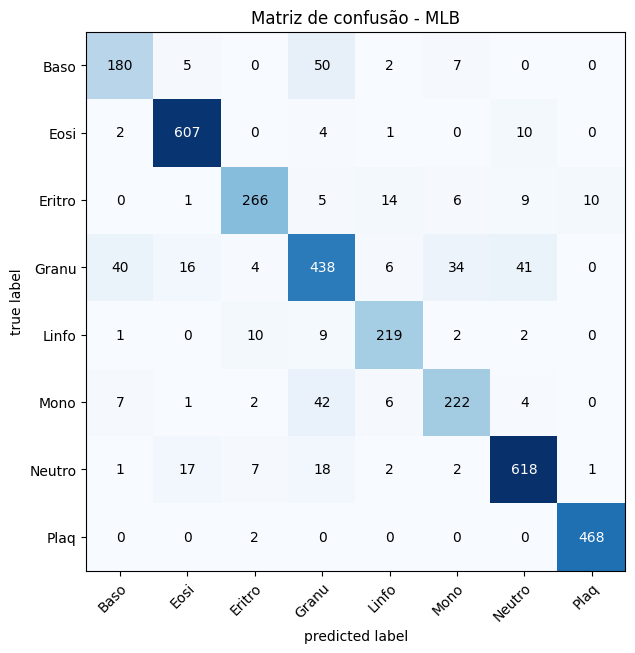

In [ ]:
# Resultados para classificação com 8 classes

# Obter as previsões (no device)
with torch.no_grad():
    y_pred = net.predict(XX_test)  # output deve estar no mesmo device
    y_true = y_test.to(device)

# Calcular métricas e exibir confmat
metric_f1_score = F1Score(task="multiclass", num_classes=n_classes).to(device)
metric_acc = Accuracy(task="multiclass", num_classes=n_classes).to(device)
metric_cm = ConfusionMatrix(task="multiclass", num_classes=n_classes).to(device)

f1_score= metric_f1_score(torch.tensor(y_pred).to(device), y_true)
acc = metric_acc(torch.tensor(y_pred).to(device), y_true)
cm = metric_cm(torch.tensor(y_pred).to(device), y_true)


print(f"F1 Score: {f1_score.item():.4f}")
print(f"Acurácia: {acc.item():.4f}")

fig, ax = plot_confusion_matrix(
    conf_mat=cm.cpu().numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10,7)
)
plt.title(f'Matriz de confusão - MLP')
plt.show()

**COMENTÁRIO:** A MLP foi construída primeiramente com base nas atividades em sala, depois através de tentativas e erros foi-se ajustando os parâmetros da rede, como lr, batch_size e num_units. Um dos resultados durante os ajustes foi o overfiting no processo de treinamento, com acc alto para treino e validação, para mitigar isso, foi acrescentada uma camada de dropout, e também foi introduzido weight decay. Juntamente, o lr foi diminuido para tentar estabilizar o desempenho, pois houve bastante variação tanto no treino, quanto no desempenho.  

Ademais, o desempenho da rede foi 0.8822 (F1_score), houve uma maioria de acertos.

## 3) Treinamento e análise de uma rede CNN artesanal

d) Construa, agora, uma rede convolucional (CNN) e analise o desempenho no conjunto de teste considerando algumas métricas globais e a matriz de confusão. Descreva a metodologia experimental e a arquitetura empregada,
bem como todas as escolhas feitas.

**Opções:**
- https://poloclub.github.io/cnn-explainer/
- CNN "trivial": conv2D + não-linearidade + pooling + flatten() + linear + softmax
- Versão miniatura de arquiteturas já consolidadas, como as ResNets e as DenseNets.

In [ ]:
class CNN(nn.Module):
    """Cria uma rede convolucional simples.

    Args:
        num_classes (int): The number of output classes.
    """

    def __init__(self, num_dense_units=128, activation_function=nn.ReLU()):
        super().__init__()

        self.num_dense_units = num_dense_units

        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,  # RGB images
                        out_channels=16,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            activation_function,
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.projector = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*32*32, out_features=num_dense_units),
            nn.Dropout(0.5), # Adiciona Dropout
            nn.Linear(num_dense_units, n_classes),  # saída com 8 classes
            nn.Softmax(dim=-1)
        )

    def forward(self, X, **kwargs):
        X = self.backbone(X)
        X = self.projector(X)
        return X


In [ ]:
torchinfo.summary(CNN().to(device=device), input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [32, 8]                   --
├─Sequential: 1-1                        [32, 16, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 16, 64, 64]          448
│    └─ReLU: 2-2                         [32, 16, 64, 64]          --
│    └─MaxPool2d: 2-3                    [32, 16, 32, 32]          --
├─Sequential: 1-2                        [32, 8]                   --
│    └─Flatten: 2-4                      [32, 16384]               --
│    └─Linear: 2-5                       [32, 128]                 2,097,280
│    └─Dropout: 2-6                      [32, 128]                 --
│    └─Linear: 2-7                       [32, 8]                   1,032
│    └─Softmax: 2-8                      [32, 8]                   --
Total params: 2,098,760
Trainable params: 2,098,760
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 125.87
Input size (MB): 1.57
Forw

In [ ]:
""" Crie um callback relacionado à acurácia de validação para parada antecipada """
estop = callbacks.EarlyStopping(
    monitor='valid_acc',     # monitora a acurácia na validação
    patience=50,                 # para se não houver melhora em 50 épocas
    threshold=0.0001,
    lower_is_better=False,
    load_best=True
)


In [ ]:
""" Criando o modelo completo com a especificação de parâmetros do loop de treinamento """

net = NeuralNetClassifier(
    module=CNN(),
    max_epochs= 200,
    batch_size= 128,
    module__num_dense_units = 256,

    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    optimizer= torch.optim.Adam,
    optimizer__weight_decay = 0.01,
    optimizer__lr = 0.0001,

    #Deve haver uma separação de parte dos dados para validação e parada antecipada
    train_split = predefined_split(valid_data),
    callbacks = [estop,
                 callbacks.EpochScoring(scoring='accuracy', name='train_acc', on_train=True)],
    device=device,
)

""" O que deve ser colocado como entrada e saída para o fit da rede?

    COMPLETAR

"""

net.fit(X=XX_train, y=y_train)

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.4510        1.5717       0.6822        1.1046  0.7371
      2       0.6695        1.0170       0.7342        0.8735  0.6634
      3       0.7118        0.8713       0.7553        0.7524  0.6648
      4       0.7309        0.8056       0.7821        0.6963  0.6683
      5       0.7509        0.7555       0.8032        0.6619  1.0581
      6       0.7578        0.7332       0.7629        0.6645  1.4437
      7       0.7625        0.7157       0.8072        0.6168  0.7100
      8       0.7734        0.6854       0.7932        0.6039  0.6629
      9       0.7797        0.6691       0.8248        0.5834  0.6699
     10       0.7899        0.6489       0.7932        0.5976  0.6615
     11       0.7862        0.6454       0.8183        0.5606  0.6700
     12       0.7965        0.6254       0.8084        0.5858  0.6740
     13       0.7929

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN(
    (backbone): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (projector): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=16384, out_features=256, bias=True)
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=8, bias=True)
      (4): Softmax(dim=-1)
    )
  ),
)

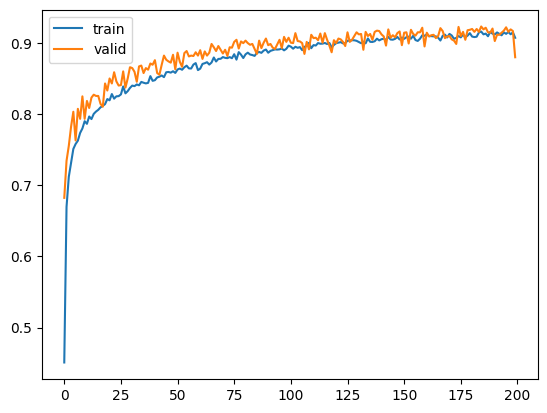

In [ ]:
plt.plot(net.history[:, 'train_acc'])
plt.plot(net.history[:, 'valid_acc'])
plt.legend(['train', 'valid'])
plt.show()

F1 Score: 0.9252
Acurácia: 0.9252


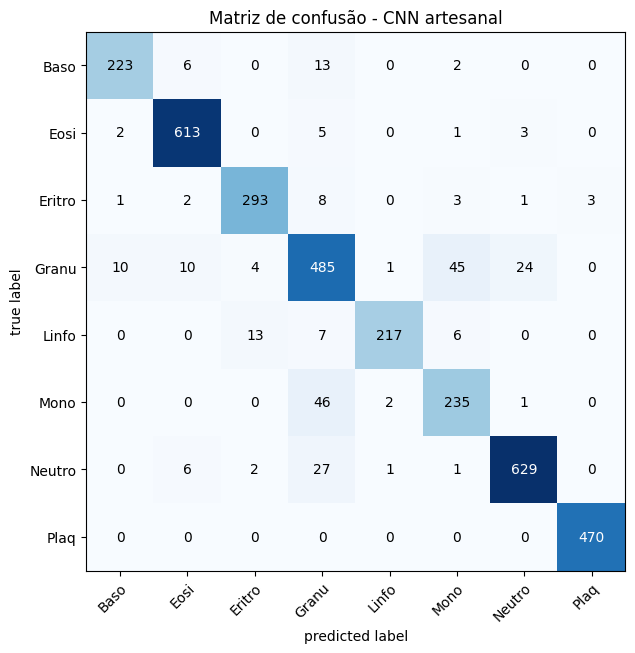

In [ ]:
# Resultados para classificação com 8 classes

# Obter as previsões (no device)
with torch.no_grad():
    y_pred = net.predict(XX_test)  # output deve estar no mesmo device
    y_true = y_test.to(device)

# Calcular métricas e exibir confmat
metric_f1_score = F1Score(task="multiclass", num_classes=n_classes).to(device)
metric_acc = Accuracy(task="multiclass", num_classes=n_classes).to(device)
metric_cm = ConfusionMatrix(task="multiclass", num_classes=n_classes).to(device)

f1_score= metric_f1_score(torch.tensor(y_pred).to(device), y_true)
acc = metric_acc(torch.tensor(y_pred).to(device), y_true)
cm = metric_cm(torch.tensor(y_pred).to(device), y_true)


print(f"F1 Score: {f1_score.item():.4f}")
print(f"Acurácia: {acc.item():.4f}")

fig, ax = plot_confusion_matrix(
    conf_mat=cm.cpu().numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10,7)
)
plt.title(f'Matriz de confusão - CNN artesanal')
plt.show()

**COMENTÁRIO:** De modo análogo a construção da MLP, aqui também foi empregado o ajuste de lr, batch_size. Contudo, como pode ser notado, foi decidido manter parâmetros como max_epochs, batch_size e module__num_dense_units para obter uma comparação mais autêntica entre os modelos. Além disso, também houve o problema de overfitting e instabilidade nas curvas de acurácia, com o intuito de melhorar o modelo, foram utilizados weight decay (10x menor que no MLP) e um lr baixo (igual ao MLP).  

O desempenho foi bom, com 0.9252 de F1_score.

## 4) Transfer Learning

e) Utilize, agora, uma CNN bem estabelecida na literatura e que esteja disponível no `torchvision.models`, aproveitando os pesos pré-treinados na ImageNet. Após adaptar a parte de saída da rede, faça o treinamento (com validação cruzada) e analise o desempenho no conjunto de teste considerando algumas métricas globais e a matriz de confusão.

**Sugestão:** pode ser vantajoso (por questões de memória) criar um novo *notebook* apenas para realizar esta parte com redes profundas e *transfer learning*.

f) Por fim, faça uma comparação geral entre os três modelos considerados - MLP, CNN artesenal e CNN com *transfer learning* -, tendo em vista o desempenho, a quantidade de parâmetros de cada modelo e o tempo consumido na fase de treinamento.

#### Utilidades

In [ ]:
import time, os
from torch.optim import lr_scheduler
from tempfile import TemporaryDirectory
from torch.utils.data import DataLoader

In [ ]:
train_dt = TensorDataset(XX_train, y_train)
## valid_data já está normalizado e disponível para uso

dataloaders = {
    'train': DataLoader(train_dt, batch_size=32, shuffle=True),
    'val': DataLoader(valid_data, batch_size=32, shuffle=False)
}

dataset_sizes = {'train': len(XX_train), 'val': len(XX_val)}
print(dataset_sizes)

{'train': 11959, 'val': 1712}


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Crie um diretório temporário para salvar os checkpoints de treinamento
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Cada epoca tem uma fase de treinamento e validacao
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Itera sobre os dados
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # Reseta os gradientes
                    optimizer.zero_grad()

                    # forward
                    # busca historico somente do treinamento
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + otimizacao somente se fase de treinamento
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # Cria um deep copy do modelo
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:.4f}')

        # Carrega os pesos do melhor modelo
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model


#### Item e

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Os pesos dos novos modulos tem requires_grad=True por padrao
num_ftrs = model_conv.fc.in_features
""" É preciso ajustar a(s) camada(s) de saida aqui

    Se utilizar apenas uma camada linear, deve-se definir qual a dimensão de saída dos dados

"""
""" COMO DEVE SER A SAÍDA? """
model_conv.fc = nn.Linear(num_ftrs, n_classes)

# model_conv.fc = nn.Sequential(
#     nn.Linear(num_ftrs, 256),
#     nn.Dropout(0.5),
#     nn.Linear(256, n_classes)
# )

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss() # já utiliza softmax internamente

# Note que apenas as novas camadas são ajustadas
optimizer_conv = torch.optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# LR Decay por um fator de 0.1 a cada 7 epocas
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
torchinfo.summary(model_conv, input_size=(32,3,64,64), device=str(device))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 8]                   --
├─Conv2d: 1-1                            [32, 64, 32, 32]          (9,408)
├─BatchNorm2d: 1-2                       [32, 64, 32, 32]          (128)
├─ReLU: 1-3                              [32, 64, 32, 32]          --
├─MaxPool2d: 1-4                         [32, 64, 16, 16]          --
├─Sequential: 1-5                        [32, 64, 16, 16]          --
│    └─BasicBlock: 2-1                   [32, 64, 16, 16]          --
│    │    └─Conv2d: 3-1                  [32, 64, 16, 16]          (36,864)
│    │    └─BatchNorm2d: 3-2             [32, 64, 16, 16]          (128)
│    │    └─ReLU: 3-3                    [32, 64, 16, 16]          --
│    │    └─Conv2d: 3-4                  [32, 64, 16, 16]          (36,864)
│    │    └─BatchNorm2d: 3-5             [32, 64, 16, 16]          (128)
│    │    └─ReLU: 3-6                    [32, 64, 16, 16]  

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=24)

Epoch 0/23
----------
train Loss: 0.8121 Acc: 0.7348
val Loss: 0.5488 Acc: 0.8207

Epoch 1/23
----------
train Loss: 0.5343 Acc: 0.8206
val Loss: 0.4664 Acc: 0.8376

Epoch 2/23
----------
train Loss: 0.4885 Acc: 0.8355
val Loss: 0.4397 Acc: 0.8481

Epoch 3/23
----------
train Loss: 0.4609 Acc: 0.8437
val Loss: 0.4196 Acc: 0.8528

Epoch 4/23
----------
train Loss: 0.4528 Acc: 0.8437
val Loss: 0.4131 Acc: 0.8516

Epoch 5/23
----------
train Loss: 0.4497 Acc: 0.8466
val Loss: 0.3979 Acc: 0.8616

Epoch 6/23
----------
train Loss: 0.4341 Acc: 0.8502
val Loss: 0.4031 Acc: 0.8563

Epoch 7/23
----------
train Loss: 0.4072 Acc: 0.8594
val Loss: 0.3960 Acc: 0.8586

Epoch 8/23
----------
train Loss: 0.4070 Acc: 0.8610
val Loss: 0.4026 Acc: 0.8627

Epoch 9/23
----------
train Loss: 0.4111 Acc: 0.8588
val Loss: 0.3957 Acc: 0.8633

Epoch 10/23
----------
train Loss: 0.4051 Acc: 0.8604
val Loss: 0.3959 Acc: 0.8616

Epoch 11/23
----------
train Loss: 0.4039 Acc: 0.8594
val Loss: 0.3940 Acc: 0.8639

Ep

F1 Score: 0.8547
Acurácia: 0.8547


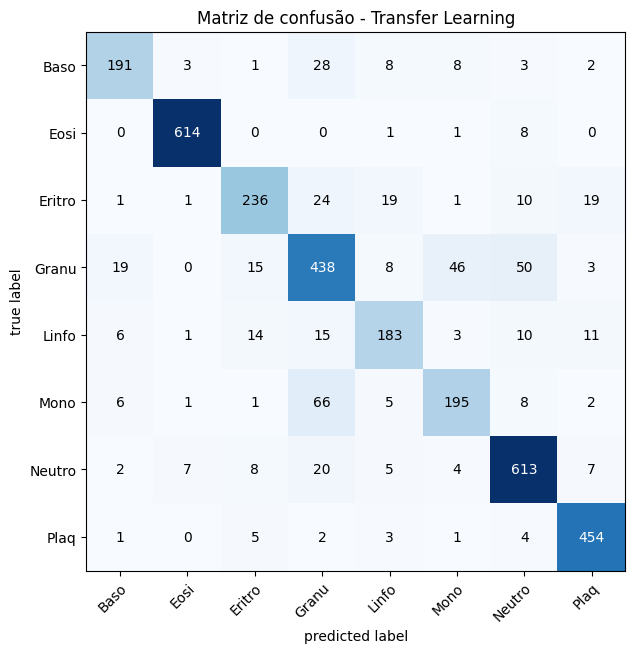

In [ ]:
# Resultados para classificação com 8 classes

# Obter as previsões (no device)
with torch.no_grad():
    # Passar o conjunto de teste pelo modelo
    outputs = model_conv(XX_test)
    _, y_pred = torch.max(outputs, 1)


# Calcular métricas e exibir confmat
metric_f1_score = F1Score(task="multiclass", num_classes=n_classes).to(device)
metric_acc = Accuracy(task="multiclass", num_classes=n_classes).to(device)
metric_cm = ConfusionMatrix(task="multiclass", num_classes=n_classes).to(device)

f1_score= metric_f1_score(y_pred, y_true)
acc = metric_acc(y_pred, y_true)
cm = metric_cm(y_pred, y_true)


print(f"F1 Score: {f1_score.item():.4f}")
print(f"Acurácia: {acc.item():.4f}")

fig, ax = plot_confusion_matrix(
    conf_mat=cm.cpu().numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10,7)
)
plt.title(f'Matriz de confusão - Transfer Learning')
plt.show()

**COMENTÁRIO:** O método de construção foi análogo aos dois modelos anteriores. Houve uma tentativa de acrescentar mais camadas ao modelo, como pode-se ver comentado no código, porém, em análise, tendo apenas uma camada linear no final, obteve-se uma classificação mais adequada.  

O desempenho aqui foi semelhante ao do MLP, porém levemente inferior.

#### Item f

| Modelo | Acurácia (Teste) | F1 Score (Teste) | Número de Parâmetros | Tempo de Treinamento |
|-----------------|------------------|------------------|-----------------------|----------------------|
| MLP             |          0.8822  |  0.8822          |  3,213,832            |        1m 20s        |
| CNN Artesanal   |     0.9252       |  0.9252          |       2,098,760       |     2m 18s           |
| Transfer Learning |     0.8547     |  0.8547          |       11,309,896      |        1m 1s         |

**COMENTÁRIO:** Sobre os modelos, a CNN artesanal teve o melhor desempenho, e também o menor número de parâmetros, porém teve o maior tempo treinamento, quase 1 minuto a mais que o tempo do MLP, por exemplo. Além disso, nota-se que os valores de Acc e F1_score estão iguais para cada modelo, o motivo talvez seja a boa quantidade de acerto dos modelos para cada classe, cf. matrizes de confusão.